<a href="https://colab.research.google.com/github/davidfague/Stylized-ReducedOrder-L5-Model/blob/main/Passive_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Neuron Initialization
Import modules and setup simulation parameters

In [1]:
!pip install neuron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Stylized-Cell-model/

/content/drive/MyDrive/Stylized-Cell-model


In [4]:
from neuron import h
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import os
from typing import Optional, List, Tuple, Union

In [5]:


from stylized_module.stylized_cell import Stylized_Cell
from stylized_module.ecp import EcpMod, newposition
from stylized_module.recorder import Recorder
from stylized_module.point_current import Point_current

mechanisms_path = 'mechanisms'  # need to compile the folder first
geometry_file = 'geom_parameters.csv'
tstop = 1000  # ms simulation duration
dt = 0.025  # ms. does not allow change

h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join(mechanisms_path,'nrnmech.dll'))  # running this line more than once might crash the kernel
h.nrn_load_dll(os.path.join(mechanisms_path,'x86_64/.libs/libnrnmech.so'))  # use this line instead in Linux
geo_standard = pd.read_csv(geometry_file,index_col='id')
h.tstop = tstop
h.dt = dt

In [6]:
#pick a random seed to initalize random values
import random
random.seed(427)
pi=np.pi

In [7]:
#generate lognormal distribution
m=.2
s=0.345
mean = np.log(m) - 0.5 * np.log((s/m)**2+1)
std = np.sqrt(np.log((s/m)**2 + 1))
print(mean)
print(std)

-2.299528896659566
1.1748114608101725


Define cell model and simulation model. Edit method "set_channels" to design biophysical properties.

In [8]:
class Cell(Stylized_Cell):
    """Define single cell model using parent class Stylized_Cell"""
    def __init__(self,geometry=None,biophys=None,dL=30,vrest=-72.0): #-90?
        """
        Initialize cell model
        geometry: pandas dataframe of cell morphology properties
        biophys: vector of biophysical parameters corresponding to "biophys_entries". Use -1 for default value.
        dL: maximum segment length
        vrest: reversal potential for leak channels
        """
        self.biophys = biophys
        super().__init__(geometry,dL,vrest)
        self.record_soma_v() # uncomment this if want to record soma voltage
        self.syn_dist_list = []
        self.gmax_list = []
        self.P_0_list = []
        self.synapse_sec_list = []
    
    def set_channels(self):
        """Define biophysical properties, insert channels"""
        self.define_biophys_entries()
        # common parameters
        for sec in self.all:
            sec.cm = 2.0
            sec.Ra = 100
            sec.insert('pas')
            sec.e_pas = self._vrest
        # fixed parameters
        soma = self.soma
        soma.cm = 1.0           # Originally 1 
        soma.insert('NaTa_t')  # Sodium channel
        soma.insert('SKv3_1')  # Potassium channel
        soma.insert('Ca_HVA')
        soma.insert('Ca_LVAst')
        soma.insert('CaDynamics_E2')
        soma.insert('Ih')
        soma.insert('SK_E2')
        soma.insert('K_Tst')
        soma.insert('K_Pst')
        soma.insert('Nap_Et2')
        soma.ena = 50
        soma.ek = -85
        

        for isec in self.grp_ids[1]:        #prox,mid,dist basal; proxtrunk; oblique
            sec = self.get_sec_by_id(isec) 
            sec.insert('NaTa_t')
            sec.insert('SKv3_1')
            sec.insert('Ca_HVA')
            sec.insert('Ca_LVAst')
            sec.insert('Im')
            sec.insert('CaDynamics_E2')
            sec.insert('Ih')
            sec.insert('SK_E2')
            sec.ena = 50
            sec.ek = -85

        for isec in self.grp_ids[2]:
            sec = self.get_sec_by_id(isec)  # Mid Trunk
            sec.insert('NaTa_t')
            sec.insert('SKv3_1')
            sec.insert('Ca_HVA')
            sec.insert('Ca_LVAst')
            sec.insert('Im')
            sec.insert('CaDynamics_E2')
            sec.insert('Ih')
            sec.insert('SK_E2')
            sec.ena = 50
            sec.ek = -85


        for isec in self.grp_ids[3]:
            sec = self.get_sec_by_id(isec)  # Distal Trunk
            sec.insert('NaTa_t')
            sec.insert('SKv3_1')
            sec.insert('Ca_HVA')
            sec.insert('Ca_LVAst')
            sec.insert('Im')
            sec.insert('CaDynamics_E2')
            sec.insert('Ih')
            sec.insert('SK_E2')
            sec.ena = 50
            sec.ek = -85

        for isec in self.grp_ids[4]:
            sec = self.get_sec_by_id(isec)  # Tuft dendrites
            sec.insert('NaTa_t')
            sec.insert('SKv3_1')
            sec.insert('Ca_HVA')
            sec.insert('Ca_LVAst')
            sec.insert('Im')
            sec.insert('CaDynamics_E2')
            sec.insert('Ih')
            sec.insert('SK_E2')
            sec.ena = 50
            sec.ek = -85


        for isec in self.grp_ids[5]:
            sec = self.get_sec_by_id(isec)  # axon
            sec.cm = 2.0
            sec.insert('NaTa_t')
            sec.insert('SKv3_1')
            sec.insert('Ca_HVA')
            sec.insert('Ca_LVAst')
            sec.insert('Im')
            sec.insert('CaDynamics_E2')
            sec.insert('Ih')
            sec.insert('SK_E2')
            sec.insert('K_Tst')
            sec.insert('K_Pst')
            sec.insert('Nap_Et2')
            sec.ena = 50
            sec.ek = -85
		        
        for isec in self.grp_ids[6]:
            sec = self.get_sec_by_id(isec)  # inactive dendrites
            sec.cm = 3.0
            sec.insert('NaTa_t')
            sec.insert('SKv3_1')
            sec.insert('Ca_HVA')
            sec.insert('Ca_LVAst')
            sec.insert('CaDynamics_E2')
            sec.insert('Ih')
            sec.ena = 50
            sec.ek = -85

        # variable parameters
        for i,entry in enumerate(self.biophys_entries):
            for sec in self.get_sec_by_id(self.grp_ids[entry[0]]):
                setattr(sec,entry[1],self.biophys[i])
        h.v_init = self._vrest
    

    def define_biophys_entries(self):
        """
        Define list of entries of biophysical parameters.
        Each entry is a pair of group id and parameter reference string.
        Define default values and set parameters in "biophys".
        """
        self.grp_sec_type_ids = [ # select section id's for each group
                                 [0], #soma
                                 [1,2,3,4,5], #basal group: prox,mid,dist basal; proxtrunk; oblique
                                 [6], #mid trunk
                                 [7], #nexus: distal trunk
                                 [8,9,10], #tuft: prox,mid,dist tuft
                                 [11], #axon
                                 [12] #passive basal dendrites
                                 ]
        self.grp_ids = []  # get indices of sections for each group
        for ids in self.grp_sec_type_ids:
            secs = []
            for i in ids:
                secs.extend(self.sec_id_lookup[i])
            self.grp_ids.append(secs)
        self.biophys_entries = [
            (0,'g_pas'),(1,'g_pas'),(2,'g_pas'),(3,'g_pas'),(4,'g_pas'),(5,'g_pas'),(6,'g_pas'),  # g_pas of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (0,'gNaTa_tbar_NaTa_t'),(1,'gNaTa_tbar_NaTa_t'),(2,'gNaTa_tbar_NaTa_t'),(3,'gNaTa_tbar_NaTa_t'),(4,'gNaTa_tbar_NaTa_t'),(5,'gNaTa_tbar_NaTa_t'),(6,'gNaTa_tbar_NaTa_t'),  # gNaTa_t of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (0,'gSKv3_1bar_SKv3_1'),(1,'gSKv3_1bar_SKv3_1'),(2,'gSKv3_1bar_SKv3_1'),(3,'gSKv3_1bar_SKv3_1'),(4,'gSKv3_1bar_SKv3_1'),(5,'gSKv3_1bar_SKv3_1'),(6,'gSKv3_1bar_SKv3_1'),  # gSKv3_1 of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (0, 'gCa_HVAbar_Ca_HVA'),(1, 'gCa_HVAbar_Ca_HVA'),(2, 'gCa_HVAbar_Ca_HVA'),(3, 'gCa_HVAbar_Ca_HVA'),(4, 'gCa_HVAbar_Ca_HVA'),(5, 'gCa_HVAbar_Ca_HVA'),(6, 'gCa_HVAbar_Ca_HVA'),  # gCA_HVA of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (0, 'gCa_LVAstbar_Ca_LVAst'),(1, 'gCa_LVAstbar_Ca_LVAst'),(2, 'gCa_LVAstbar_Ca_LVAst'),(3, 'gCa_LVAstbar_Ca_LVAst'),(4, 'gCa_LVAstbar_Ca_LVAst'),(5, 'gCa_LVAstbar_Ca_LVAst'),(6, 'gCa_LVAstbar_Ca_LVAst'),# gCA_LVAst of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (1, 'gImbar_Im'),(2, 'gImbar_Im'),(3, 'gImbar_Im'),(4, 'gImbar_Im'),(5, 'gImbar_Im'), # gIm oof soma, basal, midTrunk, distTrunk, tuft, axon
            (0,'decay_CaDynamics_E2'),(1,'decay_CaDynamics_E2'),(2,'decay_CaDynamics_E2'),(3,'decay_CaDynamics_E2'),(4,'decay_CaDynamics_E2'),(5,'decay_CaDynamics_E2'),(6,'decay_CaDynamics_E2'), # decay_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (0,'gamma_CaDynamics_E2'),(1,'gamma_CaDynamics_E2'),(2,'gamma_CaDynamics_E2'),(3,'gamma_CaDynamics_E2'),(4,'gamma_CaDynamics_E2'),(5,'gamma_CaDynamics_E2'),(6,'gamma_CaDynamics_E2'), # gamma_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (0,'gIhbar_Ih'),(1,'gIhbar_Ih'),(2,'gIhbar_Ih'),(3,'gIhbar_Ih'),(4,'gIhbar_Ih'),(5,'gIhbar_Ih'),(6,'gIhbar_Ih'), # gIh of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
            (0,'gSK_E2bar_SK_E2'),(1,'gSK_E2bar_SK_E2'),(2,'gSK_E2bar_SK_E2'),(3,'gSK_E2bar_SK_E2'),(4,'gSK_E2bar_SK_E2'),(5,'gSK_E2bar_SK_E2'), # gSk_E2 of soma, basal, midTrunk, distTrunk, tuft, axon
            (0,'gK_Tstbar_K_Tst'),(5,'gK_Tstbar_K_Tst'), # gK_Tst of soma, axon
            (0,'gK_Pstbar_K_Pst'),(5,'gK_Pstbar_K_Pst'), # gK_Pst of soma, axon
            (0,'gNap_Et2bar_Nap_Et2'),(5,'gNap_Et2bar_Nap_Et2') # gNap_Et2 of soma, axon
        ]

        default_biophys = np.array([0.0000338,0.0000467,0.0000489,0.0000589,0.0000589,0.0000325,0.0000100, # g_pas of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    2.04,0.0213,0.0213,0.0213,0.0213,0.0,0.0, # gNaTa_t of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal # axon was 2.89618
                                    0.693,0.000261,0.000261,0.000261,0.000261,0.0,0.0, # gSKv3_1 of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #axon was 0.473799
                                    0.000992,0.0,0.0000555,0.000555,.0000555,0.0,0.0,  # gCA_HVA of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #basal was 0.000992
                                    0.00343,0.0,0.000187,0.0187,0.000187,0.0,0.0, # gCA_LVAst of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.0,0.0000675,0.0000675,0.0000675,0.0000675,0.0, # gIm of soma, basal, midTrunk, distTrunk, tuft, axon
                                    460.0,122,122,122,122,277.300774,122, # decay_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.000501,0.000509,0.000509,0.000509,0.000509,0.000525,0.000509, # gamma_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.0002,0.0002,0.0002,0.0002,0.0002,0.0001,0.0002, # gIh of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #apic distribution should be more exponential instead of step. *need to double check the calculation that Hay does
                                    0.0441,0.0012,0.0012,0.0012,0.0012,0.000047, # gSk_E2 of soma, basal, midTrunk, distTrunk, tuft, axon
                                    0.0812,0.077274, # gK_Tst of soma, axon
                                    0.00223,0.188851, # gK_Pst of soma, axon
                                    0.00172,0.0  # gNap_Et2 of soma, axon
                                    ])

        


        if self.biophys is not None:
            # print('length of default_biophys:',len(default_biophys))
            # print('length of self.biophys:',len(self.biophys))
            for i in range(len(self.biophys)):
                if self.biophys[i]>=0:
                    default_biophys[i]=self.biophys[i]
        self.biophys = default_biophys
    

    def add_synapse(self,stim,sec_index,**kwargs):
        """Add synapse to a section by its index"""
        self.injection.append(Synapse(self,stim,sec_index,**kwargs))
        # self.syn_dist_list.append(self.syn_dist)
        # self.gmax_list.append(self.gmax_list)
        # self.P_0_list.append(self.)
        # self.synapse_sec_list = []
 

    def record_soma_v(self):
        self.v_rec = Recorder(self.soma(.5),'v')
    
    def v(self):
        """Return recorded soma membrane voltage in numpy array"""
        if hasattr(self,'v_rec'):

            return self.v_rec.as_numpy()

class Synapse(Point_current):
    def __init__(self,cell,stim,sec_index,gmax=1,loc=0.5,record=True, SynType='exc',P_0=0.6): 
        super().__init__(cell,sec_index,loc)
        self.stim = stim
        self.gmax = gmax
        self.loc = loc
        self.syntype = SynType
        self.P_0 = P_0
        self.setup(record,loc,P_0,gmax)

        

    def setup(self,record,loc,P_0,gmax):
        self.setup_synapse(loc,P_0,gmax)
        if record:
            self.setup_recorder()
    
    def setup_synapse(self,loc,P_0,gmax): 
        if self.syntype == 'inh':
          self.pp_obj = h.int2pyr(self.get_section()(loc))
          #Assigns random generator of release probability.
          r = h.Random()
          r.MCellRan4()
          r.uniform(0,1)
          self.pp_obj.setRandObjRef(r)
          #A list of random generators is kept so that they are not automatically garbaged.
          self.generator = r
          syn = self.pp_obj
          syn.setRandObjRef(r)
          syn.P_0 = P_0
          syn.initW = gmax
          self.nc = h.NetCon(self.stim,syn,1,0,1)

        else:
          self.pp_obj = h.pyr2pyr(self.get_section()(loc))
          #Assigns random generator of release probability.
          r = h.Random()
          r.MCellRan4()
          r.uniform(0,1)
          self.pp_obj.setRandObjRef(r)
          #A list of random generators is kept so that they are not automatically garbaged.
          self.generator = r
          syn = self.pp_obj
          syn.setRandObjRef(r)
          syn.P_0 = P_0
          syn.initW = gmax
          self.nc = h.NetCon(self.stim,syn,1,0,1)

    def setup_recorder(self):
          size = [round(h.tstop/h.dt)+1] if hasattr(h,'tstop') else []
          try:
              self.rec_vec = h.Vector(*size).record(self.pp_obj._ref_igaba)
          except:
                  self.rec_vec = MultiSynCurrent()
                  vec_inmda = h.Vector(*size).record(self.pp_obj._ref_inmda)
                  vec_iampa = h.Vector(*size).record(self.pp_obj._ref_iampa)
                  self.rec_vec.add_vec(vec_inmda)
                  self.rec_vec.add_vec(vec_iampa)
                  

class MultiSynCurrent(object):
    def __init__(self):
        self.vec_list = []
    
    def add_vec(self,vec):
        self.vec_list.append(vec)
    
    def as_numpy(self):
        return np.sum(np.array([vec.as_numpy() for vec in self.vec_list]), axis=0)


class Simulation(object):
    def __init__(self,geometry,electrodes,loc_param=[0.,0.,0.,0.,1.,0.],
                 geo_param=[-1],biophys=[-1],
                 gmax=0.015,
                 scale=1.0,ncell=1,
                 spike_threshold: Optional[float] = None): #initially __init__(self,geometry,electrodes,loc_param=[0.,0.,0.,0.,1.,0.],geo_param=[-1],biophys=[-1],gmax=0.015,scale=1.0,ncell=1):
        #exc_dens=2.16,
       #
        # inh_dens=0.22
        """
        Initialize simulation object
        geometry: pandas dataframe of cell morphology properties
        electrodes: array of electrode coordinates, n-by-3
        loc_param: location parameters, ncell-by-6 array, (x,y,z,theta,h,phi)
        geo_param: geometry parameters, ncell-by-k array, if not specified, use default properties in geometry
        biophys: biophysical parameters, ncell-by-k array, if not specified, use default properties
        gmax: maximum conductance of synapse, ncell-vector, if is single value, is constant for all cells
        scale: scaling factors of lfp magnitude, ncell-vector, if is single value, is constant for all cells
        ncell: number of cells in the simulation, required if simulating for multiple cells
        """
        self.ncell = ncell  # number of cells in this simulation
        self.cells = []  # list of cell object
        self.lfp = []  # list of EcpMod object
        self.define_geometry_entries()  # list of entries to geometry dataframe
        self.geometry = geometry.copy()
        self.electrodes = electrodes
        self.set_loc_param(loc_param)
        self.set_geo_param(geo_param)
        self.set_biophys(biophys)
        self.set_gmax(gmax)
        self.set_scale(scale)
        self.create_cells()  #exc_dens,inh_dens, create cell objects with properties set up
        self.t_vec = h.Vector( round(h.tstop/h.dt)+1 ).record(h._ref_t)  # record time
        self.spike_threshold = None
        self.record_spikes(spike_threshold)



    def set_netstim(self, syn_number, inhfreq, excfreq, inhFRstd, excFRstd, syntype):
        """Setup spontaneous synaptic input event"""
        stim_list = []
        self.stim = stim_list
        excFRlist=np.random.normal(loc=excfreq, scale=excFRstd, size=syn_number)
        inhFRlist=np.random.normal(loc=inhfreq, scale=inhFRstd, size=syn_number)
        for i in range(syn_number):
          if syntype[i] == 'inh':
            frequency = inhfreq
            spikeinterval = 1000/frequency
            stim = h.NetStim()
            stim.number = 1000 #2  # average number of spikes #check that this does not affect spike freq. hopefully only affects duration of stim. 
            #max frequency input for L5 is 16 hz meaning stim.number should be at least tstop/30, but minimize number for better runtime
            stim.start = 50 #(np.random.rand()*50)+50 #startspikes #50  #  most likely start time of first spike
            stim.noise = 1  # fractional randomness
            stim.interval =  spikeinterval #500  # mean time between spikes (ms)
            #duration of stimulation = stim.interval X stim.number
            stim_list.append(stim)
          elif syntype[i] == 'exc':
              frequency = excfreq
              spikeinterval = 1000/frequency
              stim = h.NetStim()
              stim.number = 1000 #2  # average number of spikes #check that this does not affect spike freq. hopefully only affects duration of stim. 
              #max frequency input for L5 is 16 hz meaning stim.number should be at least tstop/30, but minimize number for better runtime
              stim.start = 50 #(np.random.rand()*50)+50 #startspikes #50  #  most likely start time of first spike
              stim.noise = 1  # fractional randomness
              stim.interval =  spikeinterval #500  # mean time between spikes (ms)
              #duration of stimulation = stim.interval X stim.number
              stim_list.append(stim)
    
    def pack_parameters(self,param,ndim,param_name):
        """Pack parameters for the simulation"""
        if ndim==0:
            if not hasattr(param,'__len__'):
                param = [param]
            param = np.array(param).ravel()
            if param.size!=self.ncell:
                if param.size==1:
                    param = np.broadcast_to(param,self.ncell)
                else:
                    raise ValueError(param_name+" size does not match ncell")   
        if ndim==1:
            param = np.array(param)
            if param.ndim==1:
                param = np.expand_dims(param,0)
            if param.shape[0]!=self.ncell:
                if param.shape[0]==1:
                    param = np.broadcast_to(param,(self.ncell,param.shape[1]))
                else:
                    raise ValueError(param_name+" number of rows does not match ncell")
        return param
    
    def set_loc_param(self,loc_param):
        """Setup location parameters. loc_param ncell-by-6 array"""
        loc_param = self.pack_parameters(loc_param,1,"loc_param")
        self.loc_param = [(loc_param[i,:3],loc_param[i,3:]) for i in range(self.ncell)]
    
    def set_geo_param(self,geo_param):
        """Setup geometry parameters. geo_param ncell-by-k array, k entries of properties"""
        self.geo_param = self.pack_parameters(geo_param,1,"geo_param")
    
    def set_biophys(self,biophys):
        """Setup geometry parameters. geo_param ncell-by-k array, k entries of properties"""
        self.biophys = self.pack_parameters(biophys,1,"biophys")
    
    # def set_gmax(self,gmaxEXC,gmaxINH):
    #     """Setup maximum conductance of synapse"""
    #     self.gmaxEXC = self.pack_parameters(gmaxEXC,0,"gmaxEXC")
    #     self.gmaxINH = self.pack_parameters(gmaxINH,0,"gmaxINH")
    def set_gmax(self,gmax):
        """Setup maximum conductance of synapse"""
        self.gmax = self.pack_parameters(gmax,0,"gmax")
    
    def set_scale(self,scale):
        """setup scaling factors of lfp magnitude"""
        self.scale = self.pack_parameters(scale,0,"scale")
    
    def define_geometry_entries(self):
        """Define list of entries to geometry dataframe. Each entry is a pair of section id and property."""
        self.geo_entries = [
            #soma
            (0,'R'),  # radius
            #proximal trunk
            (4,'excitation'), # excitation ('TRUE'/'FALSE')
            (4,'inhibition'), # inhibition ('TRUE'/'FALSE')
            (4,'L'), # length
            (4,'R'), # radius
            (4,'excFRmean'), # exc FR mean
            (4,'excFRstd'), # exc FR std
            (4,'inhFRmean'), # inh FR mean
            (4,'inhFRstd'), # inh FR std
            (4,'excP_0mean'), # exc P_0 mean (0 to 1)
            (4,'excP_0std'), # exc P_0 std
            (4,'inhP_0mean'), # inh P_0 mean (0 to 1)
            (4,'inhP_0std'), # inh P_0 std
            #middle trunk
            (6,'excitation'), # excitation ('TRUE'/'FALSE')
            (6,'inhibition'), # inhibition ('TRUE'/'FALSE')
            (6,'L'), # length
            (6,'R'), # radius
            (6,'excFRmean'), # exc FR mean
            (6,'excFRstd'), # exc FR std
            (6,'inhFRmean'), # inh FR mean
            (6,'inhFRstd'), # inh FR std
            (6,'excP_0mean'), # exc P_0 mean (0 to 1)
            (6,'excP_0std'), # exc P_0 std
            (6,'inhP_0mean'), # inh P_0 mean (0 to 1)
            (6,'inhP_0std'), # inh P_0 std
            #distal trunk
            (7,'excitation'), # excitation ('TRUE'/'FALSE')
            (7,'inhibition'), # inhibition ('TRUE'/'FALSE')
            (7,'L'), # length
            (7,'R'), # radius
            (7,'excFRmean'), # exc FR mean
            (7,'excFRstd'), # exc FR std
            (7,'inhFRmean'), # inh FR mean
            (7,'inhFRstd'), # inh FR std
            (7,'excP_0mean'), # exc P_0 mean (0 to 1)
            (7,'excP_0std'), # exc P_0 std
            (7,'inhP_0mean'), # inh P_0 mean (0 to 1)
            (7,'inhP_0std'), # inh P_0 std
            #basal dendrites
            ([1,2,3],'excitation'), # excitation ('TRUE'/'FALSE')
            ([1,2,3],'inhibition'), # inhibition ('TRUE'/'FALSE')
            ([1,2,3],'nbranch'), # number of dendrites
            (1,'L'), # proximal section length
            (2,'L'), # middle section length
            (3,'L'), # distal section length
            (1,'R'), # proximal radius
            (2,'R'), # middle radius
            (3,'R'), # distal radius
            ([1,2,3],'ang'), # angle
            ([1,2,3],'excFRmean'), # exc FR mean
            ([1,2,3],'excFRstd'), # exc FR std
            ([1,2,3],'inhFRmean'), # inh FR mean
            ([1,2,3],'inhFRstd'), # inh FR std
            ([1,2,3],'excP_0mean'), # exc P_0 mean (0 to 1)
            ([1,2,3],'excP_0std'), # exc P_0 std
            ([1,2,3],'inhP_0mean'), # inh P_0 mean (0 to 1)
            ([1,2,3],'inhP_0std'), # inh P_0 std
            #oblique dendrites
            (5,'excitation'), # excitation ('TRUE'/'FALSE')
            (5,'inhibition'), # inhibition ('TRUE'/'FALSE')
            (5,'nbranch'), # number of dendrites
            (5,'L'), # length
            (5,'R'), # radius
            (5,'ang'), # angle
            (5,'excFRmean'), # exc FR mean
            (5,'excFRstd'), # exc FR std
            (5,'inhFRmean'), # inh FR mean
            (5,'inhFRstd'), # inh FR std
            (5,'excP_0mean'), # exc P_0 mean (0 to 1)
            (5,'excP_0std'), # exc P_0 std
            (5,'inhP_0mean'), # inh P_0 mean (0 to 1)
            (5,'inhP_0std'), # inh P_0 std
            # tuft dendrites
            ([8,9,10],'excitation'), # excitation ('TRUE'/'FALSE')
            ([8,9,10],'inhibition'), # inhibition ('TRUE'/'FALSE')
            ([8,9,10],'nbranch'), # number of dendrites
            (8,'L'), # proximal section length
            (9,'L'), # middle section length
            (10,'L'), # distal section length
            (8,'R'), # proximal radius
            (9,'R'), # middle radius
            (10,'R'), # distal radius
            ([8,9,10],'ang'), # angle
            ([8,9,10],'excFRmean'), # exc FR mean
            ([8,9,10],'excFRstd'), # exc FR std
            ([8,9,10],'inhFRmean'), # inh FR mean
            ([8,9,10],'inhFRstd'), # inh FR std
            ([8,9,10],'excP_0mean'), # exc P_0 mean (0 to 1)
            ([8,9,10],'excP_0std'), # exc P_0 std
            ([8,9,10],'inhP_0mean'), # inh P_0 mean (0 to 1)
            ([8,9,10],'inhP_0std'), # inh P_0 std
            #axon
            (11,'L'), # length
            (11,'R'), # radius
            #passive basal
            (12,'nbranch'), # number of dendrites
            (12,'L'), # length
            (12,'R') # radius
        ]
    
    def set_geometry(self,geometry,geo_param):
        """Set property values from geo_param through each entry to geometry. Return dataframe"""
        geom = geometry.copy()
        for i,x in enumerate(geo_param):
            if x>=0:
                geom.loc[self.geo_entries[i]] = x
        return geom

    def record_spikes(self, threshold: Optional[float]) -> None:
        """Setup spike recorder for all cells"""
        for cell in self.cells:
            cell.set_spike_recorder(threshold)
        self.spike_threshold = threshold

    def create_cells(self): #exc_dens,inh_dens

        """Create cell objects with properties set up"""
        self.cells.clear()  # remove cell objects from previous run
        self.lfp.clear()
        # Create cell with morphology and biophysical parameters
        for i in range(self.ncell):
            geometry = self.set_geometry(self.geometry,self.geo_param[i,:])
            self.cells.append( Cell(geometry=geometry,biophys=self.biophys[i,:]) )
        # add injection current or synaptic current and set up lfp recording
        min_dist = 10.0 # minimum distance allowed between segment and electrode. Set to None if not using.
        for i,cell in enumerate(self.cells):
          self.lfp.append( EcpMod(cell,self.electrodes,move_cell=self.loc_param[i],scale=self.scale[i],min_distance=min_dist) )
          # Current injection in soma
          #cell.add_injection(sec_index=19,record=True,delay=150,dur=150,amp=0.1) # Tune for proper action potential 
          for id,sec in self.geometry.iterrows():
              sec_index_list=cell.sec_id_lookup[id]
              L = sec['L']
              # Clustering
              # funcgrouplength=100 #desired functional group length (um)      #warning: rounding may alter
              # clusterlength=5 #desired cluster length (um)                    #warning: rounding may alter
              # #calculate number of functional groups and clusters on this section
              # funcgrps=round(L/funcgrouplength)
              # clusters=int(np.floor(L/clusterlength))
              # if funcgrps==0:
              #   funcgrps=1
              # if clusters==0:
              #   clusters=1
              # print('The number of clusters is ',clusters)
              # #calculate the bounds of functional groups on this section
              # grpx=[]
              # for num in range(funcgrps):
              #   grpx.append(num/funcgrps)
              # grpx.append(1)
              # print('grpx for ',sec['name'],funcgrps,' is ',grpx)
              # #calculate the bounds of clusters on this section
              # clusterx=[]
              # for num in range(clusters):
              #   clusterx.append(num/clusters)
              # clusterx.append(1)
              # print('clusterx for ',sec['name'],clusters,' is ',clusterx)
              # #print(funcgrps)

              #pull section synaptic parameters
              excP_0mean=sec['excP_0mean']
              excP_0std=sec['excP_0std']
              inhP_0mean=sec['inhP_0mean']
              inhP_0std=sec['inhP_0std']
              excFRmean=sec['excFRmean']
              excFRstd=sec['excFRstd']
              inhFRmean=sec['inhFRmean']
              inhFRstd=sec['inhFRstd']
              inhibition=sec['inhibition']
              excitation=sec['excitation']
              inh_dens=sec['inh_dens']
              exc_dens=sec['exc_dens']

              if id==0: # soma
                print('soma skipped') #skip soma
                # ### add specific inhibition to soma
                # syn_number = 406
                # #print(self.stim)
                # syn_dist = np.random.rand(syn_number) #generate distribution for location
                # syn_type_list = ['inh' for y in range(syn_number)] #assign randomly, adhere to proportion
                # #print(syn_type_list)
                # self.set_netstim(syn_number,inhfreq=inhFRmean,excfreq=excFRmean,excFRstd=excFRstd,inhFRstd=inhFRstd,syntype=syn_type_list)
                # # print(self.stim)
                # P_0inhlist=np.random.normal(loc=inhP_0mean, scale=inhP_0std, size=syn_number)
                # P_0exclist=np.random.normal(loc=excP_0mean, scale=excP_0std, size=syn_number)
                # for j in range(syn_number):
                #   cell.add_synapse(stim=self.stim[j],sec_index=sec_index_list[0],gmax=1,loc=syn_dist[j],SynType=syn_type_list[j],P_0=P_0inhlist[j])

              elif id == 1:
                print (sec['name'],' skipped')
              elif id == 2:
                print (sec['name'],' skipped')
              elif id == 3:
                print (sec['name'],' skipped')
              elif id == 4:
                print (sec['name'],' skipped')
              elif id == 5:
                print (sec['name'],' skipped')
              elif id == 6:
                print (sec['name'],' skipped')
              elif id == 7:
                print (sec['name'],' skipped')
              elif id == 8:
                print (sec['name'],' skipped')
              elif id == 9:
                print (sec['name'],' skipped')
              elif id == 10:
                print (sec['name'],' skipped')
              elif id == 11:
                print (sec['name'],' skipped')
              elif id == 12:
                print (sec['name'],' skipped')
  
              else: # add synapses to each section
                  if sec['excitation']:
                      syn_exc_number = np.round((exc_dens)*L) # number of synapses on dendrites = density (syn/um) times length of dendrites (um)
                  else: 
                      syn_exc_number=0
                  if sec['inhibition']:
                      syn_inh_number = np.round((inh_dens)*L)
                  else: 
                      syn_inh_number=0
                  if (not sec['inhibition']) and (not sec['excitation']):
                      print(sec['name'],'has no synapses')
                  else:
                      syn_number = int(syn_inh_number + syn_exc_number) #total number of synapses on the section
                      prop_exc = syn_exc_number/syn_number #used for assigning type
                      for isec in range(len(sec_index_list)):
                          #print(sec['name'],'has ',funcgrps,' groups and ',syn_number,' synapses')
                          syn_dist = np.random.rand(syn_number) #generate random values for 'x' normalized location along section
                          rand_syntype = np.random.rand(syn_number)  #generate random values for determining type
                          gmax_dist = np.random.lognormal(mean, std, syn_number) #generate random values for gmax
                          syn_type_list = ['exc' if y< prop_exc else #generate list of synapse type by assigning type using random values 
                                          'inh' for y in rand_syntype]
                          self.set_netstim(syn_number,inhfreq=inhFRmean,excfreq=excFRmean,excFRstd=excFRstd,inhFRstd=inhFRstd,syntype=syn_type_list) #generate list of presynaptic spike trains
                          #below implementation would use synapse location and group bounds to group inputs
                          #self.set_grp_netstim(syn_number,inhfreq=inhFRmean,excfreq=excFRmean,excFRstd=excFRstd,inhFRstd=inhFRstd,syntype=syn_type_list,loc=syn_dist,clusterx=clusterx,grpx=grpx) #generate list of clustered presynaptic spike trains
                          # print(self.stim)
                          P_0exclist=np.random.normal(loc=excP_0mean, scale=excP_0std, size=syn_number)
                          P_0inhlist=np.random.normal(loc=inhP_0mean, scale=inhP_0std, size=syn_number)
                          for j in range(syn_number): #add synapses using list indices
                            if syn_type_list[j] == 'exc':
                              cell.add_synapse(stim=self.stim[j],sec_index=sec_index_list[isec],gmax=gmax_dist[j],loc=syn_dist[j],SynType=syn_type_list[j],P_0=P_0exclist[j])
                            elif syn_type_list[j] == 'inh':
                              cell.add_synapse(stim=self.stim[j],sec_index=sec_index_list[isec],gmax=1,loc=syn_dist[j],SynType=syn_type_list[j],P_0=P_0inhlist[j])
                            else:
                              print('Error: syn_type not exc/inh')

    
    def run(self):
        """Run simulation"""
        h.run()
    
    def t(self):
        """Return simulation time vector"""
        return self.t_vec.as_numpy()
    
    def get_lfp(self,index=0):
        """Return LFP array of the cell by index (indices), (cells-by-)channels-by-time"""
        if not hasattr(index,'__len__'):
            lfp = self.lfp[index].calc_ecp()
        else:
            index = np.asarray(index).ravel()
            lfp = np.stack([self.lfp[i].calc_ecp() for i in index],axis=0)
        return lfp

    def get_spike_time(self, index: Union[np.ndarray, List[int], int, str] = 0) -> np.ndarray:
        """
        Return soma spike time of the cell by index (indices), ndarray (list of ndarray)
        Parameters
        index: index of the cell to retrieve the spikes from
        """
        if self.spike_threshold is None:
            raise ValueError("Spike recorder was not set up.")
        if type(index) is str and index == 'all':
            index = range(self.ncell)
        if not hasattr(index, '__len__'):
            spk = self.cells[index].spikes.as_numpy().copy()
        else:
            index = np.asarray(index).ravel()
            spk = np.array([self.cells[i].spikes.as_numpy().copy() for i in index], dtype=object)
        return spk

    def get_spike_number(self, index: Union[np.ndarray, List[int], int, str] = 0) -> Union[int, np.ndarray]:
        """
        Return soma spike number of the cell by index (indices), int (ndarray)
        Parameters
        index: index of the cell to retrieve the spikes from
        """
        if self.spike_threshold is None:
            raise ValueError("Spike recorder was not set up.")
        if index == 'all':
            index = range(self.ncell)
        if not hasattr(index, '__len__'):
            spk = self.get_spike_time(index)
            nspk = spk.size
        else:
            index = np.asarray(index).ravel()
            spk = self.get_spike_time(index)
            nspk = np.array([s.size for s in spk])
        return nspk, 

#### Create simulation

In [9]:
x = np.zeros(96)
y = np.linspace(-1900,1900,96)
z = np.zeros(96)
elec_pos = pos = np.column_stack((x,y,z))

Set parameters

In [10]:
loc_param = [50,0,10,0,1,0]  # example position #D: initially this was [0,0,50,0.2,0.75,1.5], (x,y,z,theta,h,phi), h=[-1,1] phi=[-pi,pi] h=.7071067812 for 90 deg
#note on parameters: Rotate(alpha,h,phi): first rotate alpha about y-axis (spin), then rotate arccos(h) about x-axis (elevation), then rotate phi about y axis (azimuth).


# change geo_parameters from their default values #************************NOTE**********************: doesn't change the geometry values used in geom_iterrows & sec['parameter'] (like when synapses are adding using geom);
geo_param = [ # -1 uses default value                                                                  #better to edit the geom file to guarantee edits until the automation is fixed
            #soma
            -1,  # radius
#proximal trunk
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # length
            -1, # radius
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#middle trunk
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # length
            -1, # radius
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#distal trunk
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # length
            -1, # radius
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#basal dendrites
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # number of dendrites
            -1, # proximal section length
            -1, # middle section length
            -1, # distal section length
            -1, # proximal radius
            -1, # middle radius
            -1, # distal radius
            -1, # angle
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#oblique dendrites
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # number of dendrites # counted 15 in hay model
            -1, # length
            -1, # radius
            -1, # angle
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#tuft dendrites
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # number of dendrites
            -1, # proximal section length
            -1, # middle section length
            -1, # distal section length
            -1, # proximal radius
            -1, # middle radius
            -1, # distal radius
            -1, # angle
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#axon
            -1, # length
            -1, # radius # hay uses 0.5 #we had at 8
#passive basal
            -1, # number of dendrites
            -1, # length
            -1 # radius
        ]
      
      
# example of changing biophysical parameters (check "biophys_entries" in "Cell" class for meaning, bounds can also be found there)
#latest conductances from Detailed Model Updated 8/21/22
#Ih may be off for apical sections; The detailed model axon shas only g_pas, but we have given the axon some conductances closer to the soma, and may need to change
#also setting a conductance to 0.0 may throw some sort of error
biophys = [0.0000338,0.0000467,0.0000489,0.0000589,0.0000589,0.0000325,0.0000100, # g_pas of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    2.04,0.0213,0.0213,0.0213,0.0213,0.0,0.0, # gNaTa_t of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal # axon was 2.89618
                                    0.693,0.000261,0.000261,0.000261,0.000261,0.0,0.0, # gSKv3_1 of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #axon was 0.473799
                                    0.000992,0.0,0.0000555,0.000555,.0000555,0.0,0.0,  # gCA_HVA of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #basal was 0.000992
                                    0.00343,0.0,0.000187,0.0187,0.000187,0.0,0.0, # gCA_LVAst of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.0,0.0000675,0.0000675,0.0000675,0.0000675,0.0, # gIm of soma, basal, midTrunk, distTrunk, tuft, axon
                                    460.0,122,122,122,122,277.300774,122, # decay_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.000501,0.000509,0.000509,0.000509,0.000509,0.000525,0.000509, # gamma_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.0002,0.0002,0.0002,0.0002,0.0002,0.0001,0.0002, # gIh of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #apic distribution should be more exponential instead of step. *need to double check the calculation that Hay does
                                    0.0441,0.0012,0.0012,0.0012,0.0012,0.000047, # gSk_E2 of soma, basal, midTrunk, distTrunk, tuft, axon
                                    0.0812,0.077274, # gK_Tst of soma, axon
                                    0.00223,0.188851, # gK_Pst of soma, axon
                                    0.00172,0.0  # gNap_Et2 of soma, axon
                                    ]
        #                                   self.biophys_entries = [
        #     (0,'g_pas'),(1,'g_pas'),(2,'g_pas'),(3,'g_pas'),(4,'g_pas'),(5,'g_pas'),(6,'g_pas'),  # g_pas of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0,'gNaTa_tbar_NaTa_t'),(1,'gNaTa_tbar_NaTa_t'),(2,'gNaTa_tbar_NaTa_t'),(3,'gNaTa_tbar_NaTa_t'),(4,'gNaTa_tbar_NaTa_t'),(5,'gNaTa_tbar_NaTa_t'),(6,'gNaTa_tbar_NaTa_t'),  # gNaTa_t of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0,'gSKv3_1bar_SKv3_1'),(1,'gSKv3_1bar_SKv3_1'),(2,'gSKv3_1bar_SKv3_1'),(3,'gSKv3_1bar_SKv3_1'),(4,'gSKv3_1bar_SKv3_1'),(5,'gSKv3_1bar_SKv3_1'),(6,'gSKv3_1bar_SKv3_1'),  # gSKv3_1 of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0, 'gCa_HVAbar_Ca_HVA'),(1, 'gCa_HVAbar_Ca_HVA'),(2, 'gCa_HVAbar_Ca_HVA'),(3, 'gCa_HVAbar_Ca_HVA'),(4, 'gCa_HVAbar_Ca_HVA'),(5, 'gCa_HVAbar_Ca_HVA'),(6, 'gCa_HVAbar_Ca_HVA'),  # gCA_HVA of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0, 'gCa_LVAstbar_Ca_LVAst'),(1, 'gCa_LVAstbar_Ca_LVAst'),(2, 'gCa_LVAstbar_Ca_LVAst'),(3, 'gCa_LVAstbar_Ca_LVAst'),(4, 'gCa_LVAstbar_Ca_LVAst'),(5, 'gCa_LVAstbar_Ca_LVAst'),(6, 'gCa_LVAstbar_Ca_LVAst'),# gCA_LVAst of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0, 'gImbar_Im'),(1, 'gImbar_Im'),(2, 'gImbar_Im'),(3, 'gImbar_Im'),(4, 'gImbar_Im'),(5, 'gImbar_Im'), # gIm of soma, basal, midTrunk, distTrunk, tuft, axon
        #     (0,'decay_CaDynamics_E2'),(1,'decay_CaDynamics_E2'),(2,'decay_CaDynamics_E2'),(3,'decay_CaDynamics_E2'),(4,'decay_CaDynamics_E2'),(5,'decay_CaDynamics_E2'),(6,'decay_CaDynamics_E2'), # decay_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0,'gamma_CaDynamics_E2'),(1,'gamma_CaDynamics_E2'),(2,'gamma_CaDynamics_E2'),(3,'gamma_CaDynamics_E2'),(4,'gamma_CaDynamics_E2'),(5,'gamma_CaDynamics_E2'),(6,'gamma_CaDynamics_E2'), # gamma_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0,'gIhbar_Ih'),(1,'gIhbar_Ih'),(2,'gIhbar_Ih'),(3,'gIhbar_Ih'),(4,'gIhbar_Ih'),(5,'gIhbar_Ih'),(6,'gIhbar_Ih'), # gIh of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
        #     (0,'gSK_E2bar_SK_E2'),(1,'gSK_E2bar_SK_E2'),(2,'gSK_E2bar_SK_E2'),(3,'gSK_E2bar_SK_E2'),(4,'gSK_E2bar_SK_E2'),(5,'gSK_E2bar_SK_E2'), # gSk_E2 of soma, basal, midTrunk, distTrunk, tuft, axon
        #     (0,'gK_Tstbar_K_Tst'),(5,'gK_Tstbar_K_Tst'), # gK_Tst of soma, axon
        #     (0,'gK_Pstbar_K_Pst'),(5,'gK_Pstbar_K_Pst'), # gK_Pst of soma, axon
        #     (0,'gNap_Et2bar_Nap_Et2'),(5,'gNap_Et2bar_Nap_Et2') # gNap_Et2 of soma, axon
        # ]
sim = Simulation(geo_standard,elec_pos,loc_param,geo_param=geo_param,biophys=biophys,gmax=0.05,scale=100.,spike_threshold = 10)  # 0.001 -0.012 #gmax=.005, scale=100

soma skipped
proxbasal  skipped
midbasal  skipped
distbasal  skipped
proxtrunk  skipped
oblique  skipped
midtrunk  skipped
disttrunk  skipped
proxtuft  skipped
midtuft  skipped
disttuft  skipped
axon  skipped
passivebasal  skipped


Record membrane voltage at initial/middle/end of the trunk and middle of the tuft to check the propagation.

In [11]:
nseg = len(sim.cells[0].segments)
numTstep = int(tstop/dt)


seg_list = sim.cells[0].get_seg_by_id(range(nseg))

Vrecord = []
for i in range(0,len(seg_list)):
     Vrecord.append(seg_list[i])

dend_v = Recorder(Vrecord)





In [12]:
sim.run()
lfp = sim.get_lfp().T
t = sim.t()



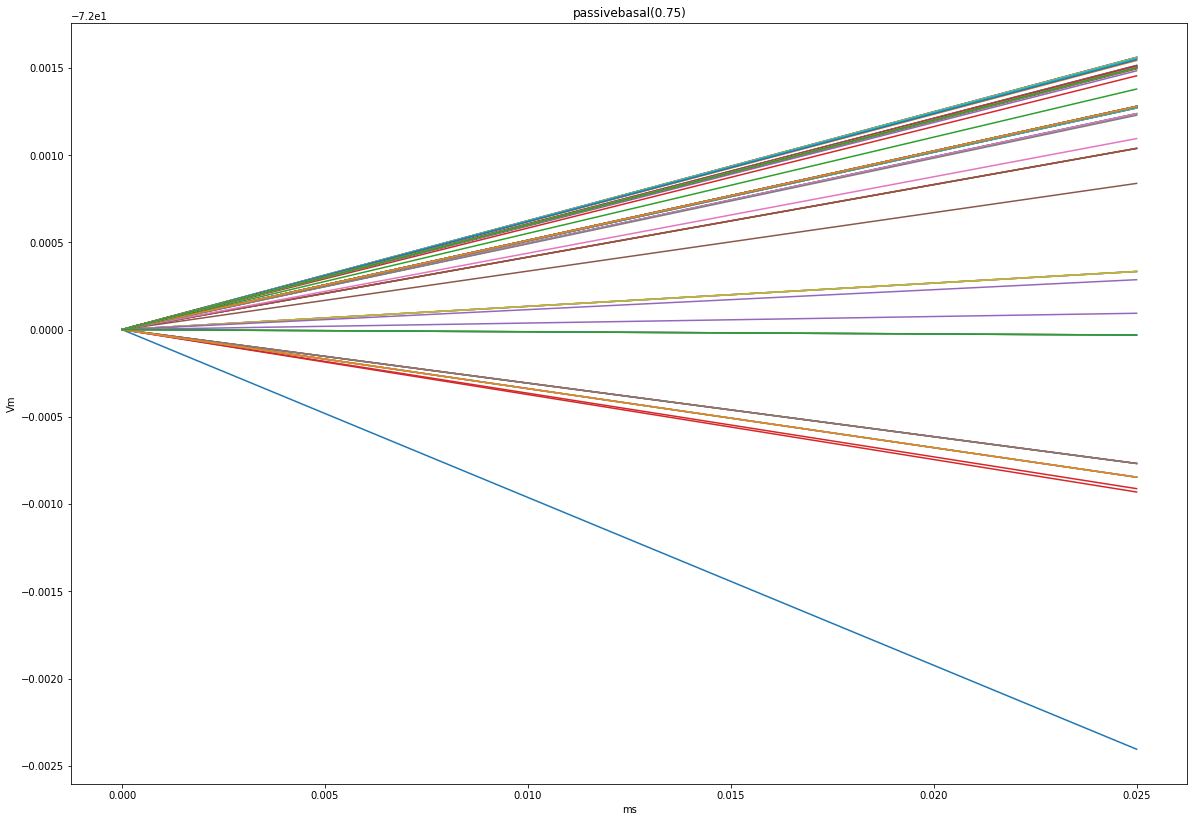

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

v_dend = dend_v.as_numpy()

plt.figure(figsize=(20,14))
for i in range(v_dend.shape[0]):
    plt.plot(t,v_dend[i,:])
    plt.title(Vrecord[i], loc='center')
    plt.ylabel('Vm')
    plt.xlabel('ms')
plt.show()

Select the timestamp

In [14]:


v_rest = v_dend[0][1]
print('v_rest =', v_rest)
v_final = v_dend[0][40000]
print('v_final = ', v_final)
deltaV = (v_rest - v_final)
print('deltaV =', deltaV)
sixthree = deltaV * 0.638
print('*0.632 =', sixthree)
Vat63 = v_rest - sixthree
print('-60 -',sixthree,'=', Vat63)


tic = 6700 #tic update not automated
print('\nV at tic ',tic,' = ', v_dend[0][tic])

timeAtV = tic/40
print('time at ',Vat63, '=', timeAtV)
t = timeAtV - 150
t_ins = t/1000

print('t =', t,' ms')
print('t = ',t_ins,' s')


deltaV = (v_rest - v_final)
deltaI = (0 - (-100))
dVdI = deltaV / (deltaI /1000)

print('\nR_in =', dVdI)


v_rest = -72.0024052177969
v_final =  nan
deltaV = nan
*0.632 = nan
-60 - nan = nan

V at tic  6700  =  nan
time at  nan = 167.5
t = 17.5  ms
t =  0.0175  s

R_in = nan




1.  V_rest = ' ms
2.  Calculation of time constant:
*   Start inject: 150ms / -60mV 
*   Final Value: ~ -70.34mV
*   Difference: -15.34   | 63.2% = 9.78   | -60 – 8.63 = - 71.78
*   Time at – 69.78: 170.375 ms
*   τ = 182.225-150 
*   τ  = 32.2249 ms
*   τ  = .032225 s

3.  Input Resistance 

  ΔV/ΔI = ( -60 – (-92.24) )/( 0 – (-100pA) ) 

  = 15.34mV / 0.1 nA 

  R_in   = 182.364 MΩ


  https://neuroelectro.org/ephys_prop/4/data/


https://pubmed.ncbi.nlm.nih.gov/19052106/

https://pubmed.ncbi.nlm.nih.gov/22761308/#&gid=article-figures&pid=figure-8-uid-7